## Predictive model - Classification

In this notebook, data clusters are examined

Dataset: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Attribute Information:

#### bank client data:

1.  **age** (numeric)
2.  **job** : type of job (categorical: 'admin.','bluecollar','entrepreneur','housemaid','management','retired','selfemployed','services','student','technician','unemployed','unknown')
3.  **marital** : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.  **education** (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.  **default**: has credit in default? (categorical: 'no','yes','unknown')
6.  **housing**: has housing loan? (categorical: 'no','yes','unknown')
7.  **loan**: has personal loan? (categorical: 'no','yes','unknown')

#### related with the last contact of the current campaign:
8.  **contact**: contact communication type (categorical: 'cellular','telephone')
9.  **month**: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.  **day_of_week**: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11.  **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### other attributes:
12.  **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.  **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.  **previous**: number of contacts performed before this campaign and for this client (numeric)
15.  **poutcome**: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

#### social and economic context attributes
16.  **emp.var.rate**: employment variation rate  quarterly indicator (numeric)
17.  **cons.price.idx**: consumer price index  monthly indicator (numeric)
18.  **cons.conf.idx**: consumer confidence index  monthly indicator (numeric)
19.  **euribor3m**: euribor 3 month rate  daily indicator (numeric)
20.  **nr.employed**: number of employees  quarterly indicator (numeric)
21.  **y**  has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
# import all the libraries

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd 

import random
random.seed(123)

from IPython.display import display
import random
import time

pd.options.display.max_columns = None
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("bank-additional/bank-additional-full.csv", sep =";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Preprocessing

In [3]:
map_dict= {"no":0, "yes":1}
df["y"] = df["y"].map(map_dict)

### Filling missing values

In [4]:
text_cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

In [5]:
cat_values_dict = {}
for col in text_cat_columns:
#     print("Column: %s, Number of unique values: %d"% (col, df[col].nunique()))
    cat_values_dict[col] = list(set(df[col].unique())-set(["unknown"]))

# filling with random values from lists of availbale categories

for col in text_cat_columns:
    n_missing = df[df[col]=="unknown"].shape[0]
    missing_index = df[df[col]=="unknown"].index
    print(col, n_missing)
    fill_vallues = cat_values_dict[col]*n_missing
    random.shuffle(fill_vallues)
    df.loc[missing_index, col]= fill_vallues[:n_missing]

job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0


In [6]:
# OHE in one column
df2 = df.copy()
map_yes_no_dict = {"yes": 1, "no":0}
map_phone_dict = {"cellular": 1, "telephone":0}
for col in ['default', 'housing','loan']:
    df2[col] = df2[col].map(map_yes_no_dict)
df2['contact'] = df2['contact'].map(map_phone_dict) 


In [7]:
# for all the rest - dummies columns
df1 = pd.get_dummies(df)
print("Original data: {}, Encoded data: {}".format(df.shape, df2.shape))

Original data: (41188, 21), Encoded data: (41188, 21)


In [8]:
features = df1.drop("y", axis=1).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[features])

## Choosing the right number of clusters

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [27]:
n_clusters = 20
kmeans_kwargs = {"init": "random", "max_iter": 300, "random_state": 123}

errors = []
silhouette_scores = []
for i in range(2, n_clusters+1):
    kmeans = KMeans(n_clusters=i, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    errors.append(kmeans.inertia_)
#     predicted_labels = kmeans.predict(scaled_features)
#     silhouette_scores.append(ilhouette_score(scaled_features, predicted_labels))

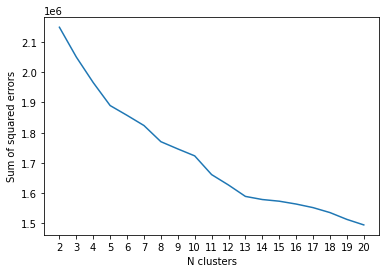

In [29]:
plt.plot(np.arange(2, n_clusters+1), errors)
plt.xlabel("N clusters")
plt.xticks(np.arange(2, n_clusters+1))
plt.ylabel("Sum of squared errors");

Considering elbow method,13 clusters seem to be optimal for the current dataset

In [32]:
kmeans = KMeans(n_clusters=13)
kmeans.fit(scaled_features)
df1["cluster"] = kmeans.predict(scaled_features)

In [35]:
df = pd.concat([df1, df["y"]], axis=1)

In [36]:
df1.groupby("cluster").size()

cluster
0     3600
1     5601
2     3973
3     7154
4     1607
5     2784
6     4893
7     1301
8     4382
9     1340
10    3825
11     546
12     182
dtype: int64

In [42]:
df_0 = df1[df1["cluster"]==0].copy()
df_1 = df1[df1["cluster"]==1].copy()

In [46]:
numerical_columns = ['age', 'duration','campaign','pdays','previous','emp.var.rate','cons.price.idx',
                     'cons.conf.idx','euribor3m','nr.employed']

In [48]:
df1.groupby("cluster")[numerical_columns+["y"]].mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
cluster,,,,,,,,,,,
0,39.685278,240.014444,3.259722,999.000000,0.000000,1.376750,94.461925,-41.785000,4.900276,5226.326250,0.044722
1,39.232816,264.643278,2.484556,999.000000,0.000000,1.088770,93.991374,-36.437350,4.857657,5191.065006,0.036422
2,39.775736,247.509439,2.004782,979.575887,1.142713,-1.680695,93.055619,-43.000327,1.668670,5095.362522,0.131135
3,38.847917,270.499441,2.147190,999.000000,0.000000,-2.031898,92.965990,-43.324098,1.216493,5081.550266,0.200308
4,43.887990,266.690106,2.899813,999.000000,0.000000,1.126758,93.930685,-39.588986,4.764149,5203.238332,0.052271
5,40.675647,249.538434,1.921336,999.000000,0.000000,-0.285560,93.198913,-41.544756,3.888803,5182.702227,0.080460
6,37.303290,273.003883,3.245248,999.000000,0.000000,1.400000,93.918000,-42.700000,4.961628,5228.100000,0.061516
7,41.843966,320.269024,1.808609,5.737894,1.629516,-2.071791,93.370387,-38.754343,1.021146,5030.429439,0.634896
8,40.624144,224.744181,2.847786,999.000000,0.000000,1.391168,93.441447,-36.090347,4.956388,5227.788019,0.051118


In [44]:
df_1.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,cluster
count,5601.000000,5601.000000,5601.000000,5601.0,5601.0,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.0,5601.000000,5601.000000,5601.000000,5601.000000,5601.0,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.0,5601.0,5601.000000,5601.000000,5601.000000,5601.000000,5601.0,5601.0,5601.0,5601.000000,5601.0,5601.0,5601.0,5601.0,5601.000000,5601.0,5601.000000,5601.0,5601.000000,5601.000000,5601.000000,5601.000000,5601.000000,5601.0,5601.0,5601.0,5601.0
mean,39.232816,264.643278,2.484556,999.0,0.0,1.088770,93.991374,-36.437350,4.857657,5191.065006,0.036422,0.225495,0.301018,0.042492,0.030352,0.074808,0.022675,0.0,0.122478,0.009820,0.149973,0.020889,0.0,0.746652,0.253348,0.120336,0.081057,0.194251,0.253348,0.007677,0.123549,0.219782,1.0,0.0,0.531512,0.468488,0.841100,0.158900,0.0,1.0,0.0,0.001428,0.0,0.0,0.0,0.0,0.989288,0.0,0.009284,0.0,0.216747,0.173719,0.167470,0.223174,0.218889,0.0,1.0,0.0,1.0
std,8.672827,252.534589,2.697251,0.0,0.0,0.121966,0.028008,0.386806,0.056801,2.847900,0.187355,0.417945,0.458741,0.201728,0.171569,0.263105,0.148877,0.0,0.327866,0.098615,0.357077,0.143026,0.0,0.434967,0.434967,0.325383,0.272947,0.395658,0.434967,0.087290,0.329096,0.414136,0.0,0.0,0.499051,0.499051,0.365616,0.365616,0.0,0.0,0.0,0.037769,0.0,0.0,0.0,0.0,0.102954,0.0,0.095914,0.0,0.412066,0.378901,0.373428,0.416412,0.413530,0.0,0.0,0.0,0.0
min,20.000000,0.000000,1.000000,999.0,0.0,-1.800000,93.444000,-40.400000,0.682000,5008.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
25%,33.000000,118.000000,1.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.856000,5191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
50%,38.000000,193.000000,2.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.857000,5191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0
75%,45.000000,324.000000,3.000000,999.0,0.0,1.100000,93.994000,-36.400000,4.859000,5191.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.0,1.000000,1.000000,1.000000,0.000000